###Μηχανική Μάθηση 
####1η ατομική εργασία 
ΣΗΜΜΥ- ΕΜΠ - 7ο εξάμηνο -Ακ. Έτος 2022-23



# ⚠️
`Επισημαίνεται ότι απαγορεύεται η ανάρτηση των λύσεων των εργαστηριακών ασκήσεων στο github, ή σε άλλες ιστοσελίδες. Η σχεδίαση και το περιεχόμενο των εργαστηριακών projects αποτελούν αντικείμενο πνευματικής ιδιοκτησίας της διδακτικής ομάδας του μαθήματος.`

 `⚠️  Το σύνολο δεδομένων που σας δόθηκε δεν πρέπει να εμπλουτισθεί με οποιοδήποτε τρόπο. Η εργασία στην οποία θα χρησιμοποιηθεί εμπλουτισμένο σύνολο δεδομένων, δεν θα διορθωθεί.`

In [1]:
import pandas as pd
import numpy as np
import scipy as sc
import seaborn as sns
import matplotlib.pyplot as plt

Ονοματεπώνυμο φοιτητή:

Α.Μ.:

### 1. Εισαγωγή συνόλου δεδομένων

Tο σύνολο δεδομένων για το training-validation μπορείτε να το κατεβάσετε από [εδώ](https://drive.google.com/file/d/1-L7QQEfLWCsqiBClxUlg4yzquf1G_Ga-/view?usp=sharing) και για το testing από [εδώ](https://drive.google.com/file/d/1-6l-NL3wwKGKJpVjxjUrOdFbcnKo-PwW/view?usp=sharing).



1.α. Φορτώστε το σύνολο δεδομένων "train-val.csv"  στο notebook σας.

In [2]:
df = pd.read_csv('train-val.csv')
y = df['RainTomorrow']
df.drop(['RainTomorrow'], axis=1, inplace=True)

In [3]:
df.isnull().sum()

id                   0
Date                 0
Location             0
MinTemp            160
MaxTemp            101
Rainfall             0
Evaporation      20384
Sunshine         22997
WindGustDir       3121
WindGustSpeed     3093
WindDir9am        3821
WindDir3pm        1328
WindSpeed9am       357
WindSpeed3pm       857
Humidity9am        558
Humidity3pm       1259
Pressure9am       4780
Pressure3pm       4789
Cloud9am         17890
Cloud3pm         18981
Temp9am            226
Temp3pm            913
RainToday            0
dtype: int64

1.β. Φορτώστε το σύνολο δεδομένων "test.csv" στο notebook σας

In [4]:
test = pd.read_csv('test.csv')
test

,id,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,...,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
0,1,2009-03-02,Albury,13.2,31.9,0.0,NaN,NaN,NNW,35.0,...,9.0,53.0,25.0,1014.1,1011.6,NaN,NaN,18.0,29.8,0.0
1,2,2009-03-07,Albury,8.3,27.9,0.0,NaN,NaN,W,37.0,...,20.0,58.0,22.0,1015.2,1012.4,NaN,NaN,13.3,27.0,0.0
2,3,2009-04-02,Albury,14.3,32.1,0.0,NaN,NaN,NE,28.0,...,11.0,59.0,30.0,1022.6,1018.4,NaN,NaN,18.4,30.9,0.0
3,4,2009-04-04,Albury,10.7,21.4,12.6,NaN,NaN,W,43.0,...,13.0,60.0,33.0,1019.8,1019.3,NaN,NaN,13.9,20.3,1.0
4,5,2009-05-03,Albury,4.6,18.9,0.0,NaN,NaN,S,15.0,...,7.0,75.0,51.0,1028.7,1025.9,NaN,NaN,10.6,18.5,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9674,9675,2017-05-12,Uluru,5.6,27.0,0.0,NaN,NaN,NNW,28.0,...,15.0,31.0,17.0,1018.8,1014.5,NaN,NaN,13.3,26.2,0.0
9675,9676,2017-05-14,Uluru,6.8,27.0,0.0,NaN,NaN,WNW,24.0,...,11.0,43.0,20.0,1018.9,1015.4,NaN,NaN,14.6,26.2,0.0
9676,9677,2017-06-07,Uluru,0.5,21.7,0.0,NaN,NaN,E,43.0,...,20.0,27.0,19.0,1029.0,1025.0,NaN,NaN,9.5,20.5,0.0
9677,9678,2017-06-13,Uluru,2.5,21.2,0.0,NaN,NaN,ENE,35.0,...,19.0,57.0,32.0,1027.2,1023.0,NaN,NaN,10.3,20.3,0.0


### 2. Διερευνητική ανάλυση δεδομένων -Exploratory Data Analysis (EDA) 
Χρησιμοποιήστε code cells  με τις κατάλληλες τεχνικές EDA για την κατανόηση του συνόλου δεδομένων και text cells για επεξήγηση των αποτελεσμάτων. 

Χρησιμοποιώντας τις κατάλληλες μεθόδους παρουσιάστε με χρήση κώδικα πληροφορίες για τα εξής:

2α. το πλήθος των δειγμάτων και των χαρακτηριστικών του συνόλου δεδομένων, 

2β. το είδος των χαρακτηριστικών του συνόλου δεδομένων,  

2γ. τις ετικέτες των χαρακτηριστικών,

2δ. το πλήθος των κατηγοριών, 

2ε. πόσα δείγματα ανήκουν σε κάθε κατηγορία,

2στ. τη συσχέτιση μεταξύ των δεδομένων,

2ζ. οποιαδήποτε άλλη πληροφορία πιστεύετε ότι είναι χρήσιμη για την κατανόηση του συνόλου δεδομένων.

In [5]:
df['id'].count()

48423

In [6]:
len(df.columns)

23

In [7]:
df.dtypes

id                 int64
Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday        float64
dtype: object

In [8]:
df.columns

Index(['id', 'Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall',
       'Evaporation', 'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am',
       'WindDir3pm', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
       'Temp9am', 'Temp3pm', 'RainToday'],
      dtype='object')

In [9]:
df['WindDir9am']

0          W
1        WSW
2        SSE
3        ESE
4         NE
        ... 
48418    ESE
48419     SE
48420    ESE
48421     SE
48422    SSE
Name: WindDir9am, Length: 48423, dtype: object

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48423 entries, 0 to 48422
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             48423 non-null  int64  
 1   Date           48423 non-null  object 
 2   Location       48423 non-null  object 
 3   MinTemp        48263 non-null  float64
 4   MaxTemp        48322 non-null  float64
 5   Rainfall       48423 non-null  float64
 6   Evaporation    28039 non-null  float64
 7   Sunshine       25426 non-null  float64
 8   WindGustDir    45302 non-null  object 
 9   WindGustSpeed  45330 non-null  float64
 10  WindDir9am     44602 non-null  object 
 11  WindDir3pm     47095 non-null  object 
 12  WindSpeed9am   48066 non-null  float64
 13  WindSpeed3pm   47566 non-null  float64
 14  Humidity9am    47865 non-null  float64
 15  Humidity3pm    47164 non-null  float64
 16  Pressure9am    43643 non-null  float64
 17  Pressure3pm    43634 non-null  float64
 18  Cloud9

In [11]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9679 entries, 0 to 9678
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             9679 non-null   int64  
 1   Date           9679 non-null   object 
 2   Location       9679 non-null   object 
 3   MinTemp        9649 non-null   float64
 4   MaxTemp        9646 non-null   float64
 5   Rainfall       9679 non-null   float64
 6   Evaporation    5595 non-null   float64
 7   Sunshine       5126 non-null   float64
 8   WindGustDir    9050 non-null   object 
 9   WindGustSpeed  9054 non-null   float64
 10  WindDir9am     8909 non-null   object 
 11  WindDir3pm     9417 non-null   object 
 12  WindSpeed9am   9615 non-null   float64
 13  WindSpeed3pm   9513 non-null   float64
 14  Humidity9am    9568 non-null   float64
 15  Humidity3pm    9445 non-null   float64
 16  Pressure9am    8764 non-null   float64
 17  Pressure3pm    8764 non-null   float64
 18  Cloud9am

In [12]:
df[df['RainToday']==1.0]['RainToday'].count()

11225

In [13]:
df.count()

id               48423
Date             48423
Location         48423
MinTemp          48263
MaxTemp          48322
Rainfall         48423
Evaporation      28039
Sunshine         25426
WindGustDir      45302
WindGustSpeed    45330
WindDir9am       44602
WindDir3pm       47095
WindSpeed9am     48066
WindSpeed3pm     47566
Humidity9am      47865
Humidity3pm      47164
Pressure9am      43643
Pressure3pm      43634
Cloud9am         30533
Cloud3pm         29442
Temp9am          48197
Temp3pm          47510
RainToday        48423
dtype: int64

In [14]:
len(y.unique())

2

In [15]:
y[y==1.0].count()

11059

In [16]:
y[y==0.0].count()

37364

In [17]:
len(y[y==1.0])

11059

In [18]:
for i in range(0, len(y.unique())):
    print(y[y==y.unique()[i]].count())

37364
11059


/var/folders/m8/41547t_d4vbb207z7w8gbgyr0000gn/T/ipykernel_6576/3081124502.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_df = df.corr()


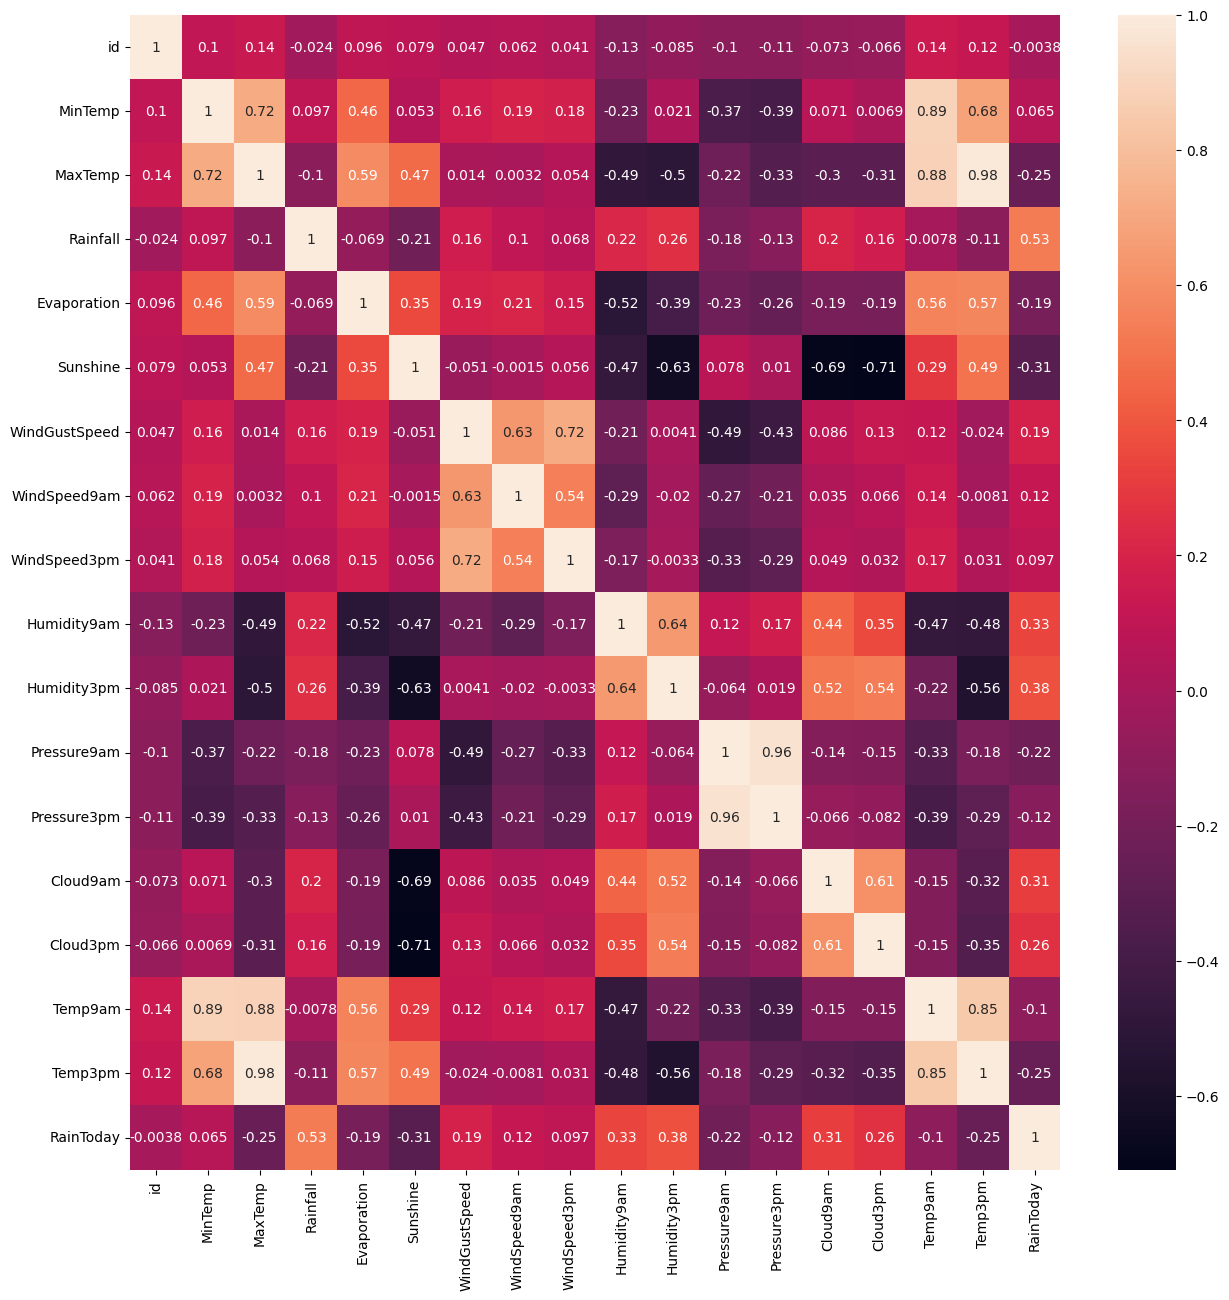

In [19]:
corr_df = df.corr()
fig, ax = plt.subplots(figsize=(15,15)) 
sns.heatmap(corr_df, annot = True, ax = ax);

### 3. Προεπεξεργασία συνόλου δεδομένων
💡`Χρησιμοποιήστε το Column Transformer για τη δημιουργία και την εφαρμογή χωριστών μετασχηματιστών για αριθμητικά και κατηγορικά δεδομένα.`




3.α.  Θα χρησιμοποιήσετε όλα τα χαρακτηριστικά του συνόλου δεδομένων για την εκπαίδευση των ταξινομητών ή θα επιλέξετε κάποια από αυτά;  Θα κάνετε κάποια συνένωση κάποιων χαρακτηριστικών για δημιουργία νέων χαρακτηριστικών για το μοντέλο σας; 


In [20]:
df['HumidityChange'] = df['Humidity9am'] - df['Humidity3pm']
df['PressureChange'] = df['Pressure9am'] - df['Pressure3pm']
df['WindSpeedChange'] = df['WindSpeed9am'] - df['WindSpeed3pm']
df['WindDirChange'] = (df['WindDir9am'] != df['WindDir3pm']).apply(lambda x: 1 if x == True else 0)
df['CloudChange'] = df['Cloud9am'] - df['Cloud3pm']
df['TempChange'] = df['Temp9am'] - df['Temp3pm']
df.drop(['Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'WindSpeed9am', 'WindSpeed3pm', 'WindDir9am', 'WindDir3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm'], axis=1, inplace=True)
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,RainToday,HumidityChange,PressureChange,WindSpeedChange,WindDirChange,CloudChange,TempChange
0,2009-03-04,Albury,13.8,22.1,0.2,NaN,NaN,WNW,57.0,0.0,31.0,1.4,-7.0,1,NaN,-6.3
1,2009-03-05,Albury,11.5,22.0,0.0,NaN,NaN,SW,50.0,0.0,27.0,1.9,-14.0,1,NaN,-7.5
2,2009-03-09,Albury,13.8,31.8,0.0,NaN,NaN,NNE,24.0,0.0,21.0,3.8,-11.0,1,NaN,-11.9
3,2009-03-10,Albury,15.5,32.0,0.0,NaN,NaN,NE,50.0,0.0,26.0,3.3,-2.0,1,NaN,-10.7
4,2009-03-11,Albury,18.4,30.5,1.2,NaN,NaN,NE,44.0,1.0,34.0,3.3,-4.0,1,NaN,-8.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48418,2017-06-12,Uluru,5.1,19.7,0.0,NaN,NaN,E,46.0,0.0,27.0,2.7,-4.0,1,NaN,-10.7
48419,2017-06-16,Uluru,5.2,24.3,0.0,NaN,NaN,E,24.0,0.0,29.0,3.8,0.0,1,NaN,-11.0
48420,2017-06-20,Uluru,3.5,21.8,0.0,NaN,NaN,E,31.0,0.0,32.0,3.5,2.0,1,NaN,-11.5
48421,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,0.0,29.0,4.2,0.0,1,NaN,-13.6


/var/folders/m8/41547t_d4vbb207z7w8gbgyr0000gn/T/ipykernel_6576/2019243131.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_corr_new = df.corr()


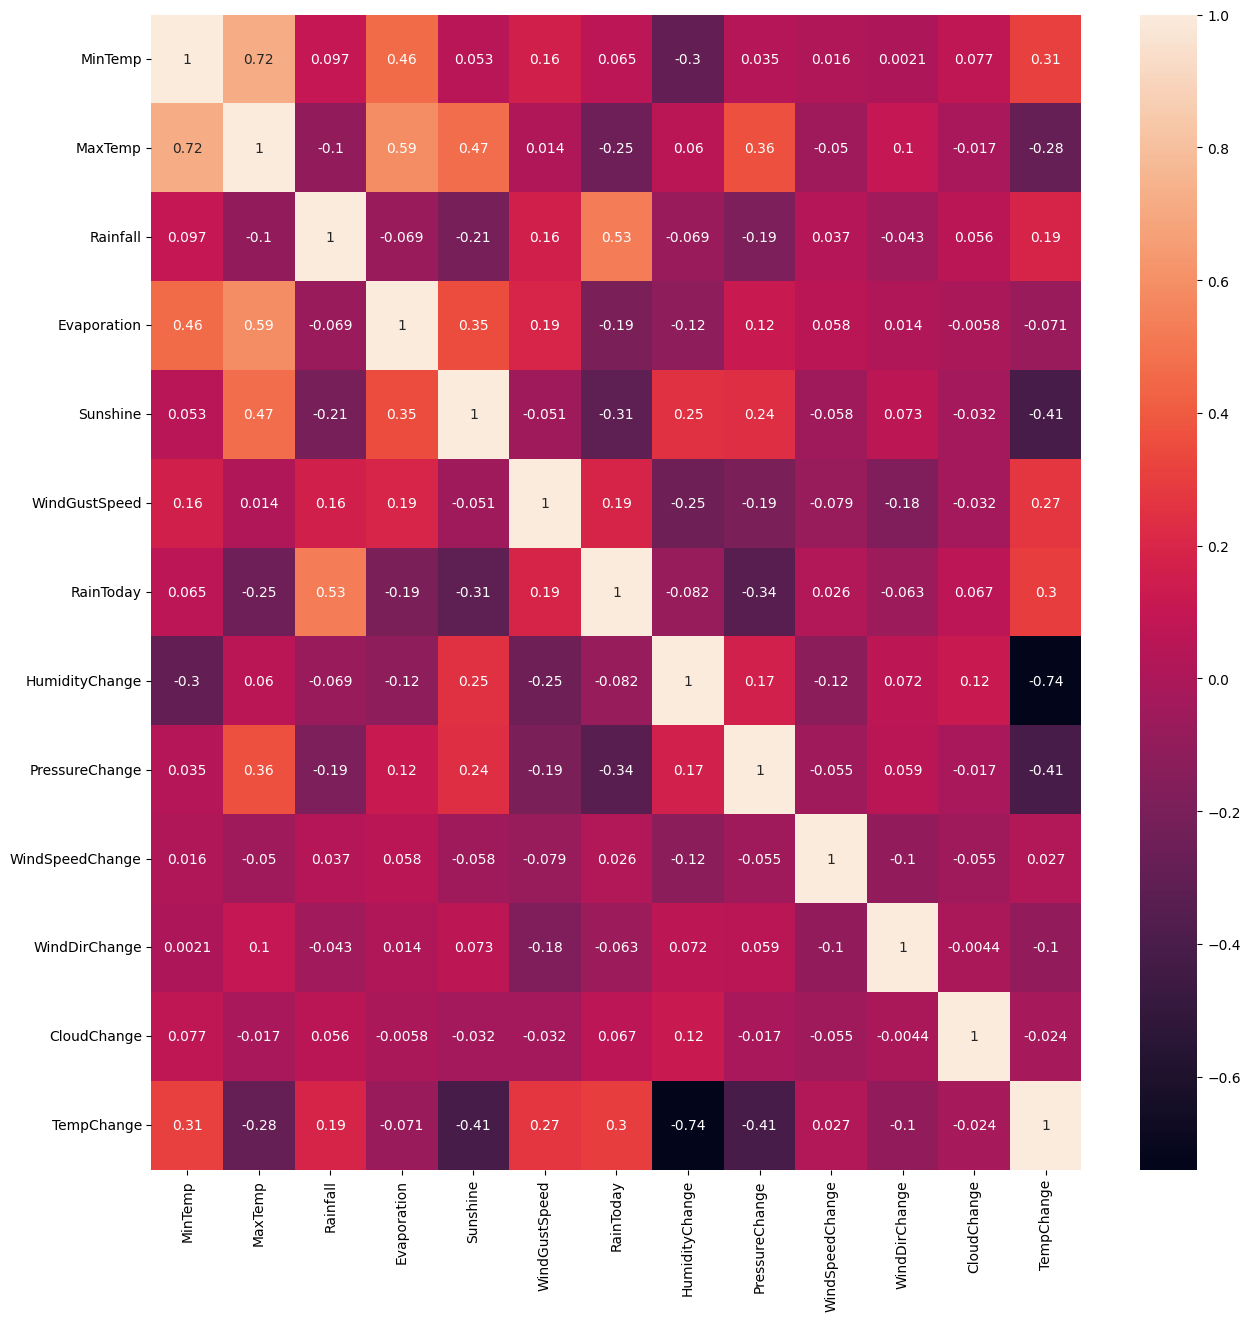

In [21]:
df_corr_new = df.corr()
fig, ax = plt.subplots(figsize=(15,15)) 
sns.heatmap(df_corr_new, annot = True, ax = ax);

3.β. Υπάρχουν απουσιάζουσες τιμές; Γράψτε κατάλληλο κώδικα ώστε να χειριστείτε αυτές τις τιμές.

In [22]:
df.isnull().sum()

Date                   0
Location               0
MinTemp              160
MaxTemp              101
Rainfall               0
Evaporation        20384
Sunshine           22997
WindGustDir         3121
WindGustSpeed       3093
RainToday              0
HumidityChange      1444
PressureChange      4852
WindSpeedChange      952
WindDirChange          0
CloudChange        20300
TempChange          1056
dtype: int64

In [23]:
big_mistakes = df.isna().mean(axis=0)
big_mistakes

Date               0.000000
Location           0.000000
MinTemp            0.003304
MaxTemp            0.002086
Rainfall           0.000000
Evaporation        0.420957
Sunshine           0.474919
WindGustDir        0.064453
WindGustSpeed      0.063875
RainToday          0.000000
HumidityChange     0.029821
PressureChange     0.100200
WindSpeedChange    0.019660
WindDirChange      0.000000
CloudChange        0.419222
TempChange         0.021808
dtype: float64

In [24]:
bm_list = big_mistakes[big_mistakes >= 0.4]
bm_list

Evaporation    0.420957
Sunshine       0.474919
CloudChange    0.419222
dtype: float64

In [25]:
df.drop(bm_list.index, axis=1, inplace=True)

In [26]:
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest,chi2

df.info()
X = df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48423 entries, 0 to 48422
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Date             48423 non-null  object 
 1   Location         48423 non-null  object 
 2   MinTemp          48263 non-null  float64
 3   MaxTemp          48322 non-null  float64
 4   Rainfall         48423 non-null  float64
 5   WindGustDir      45302 non-null  object 
 6   WindGustSpeed    45330 non-null  float64
 7   RainToday        48423 non-null  float64
 8   HumidityChange   46979 non-null  float64
 9   PressureChange   43571 non-null  float64
 10  WindSpeedChange  47471 non-null  float64
 11  WindDirChange    48423 non-null  int64  
 12  TempChange       47367 non-null  float64
dtypes: float64(9), int64(1), object(3)
memory usage: 4.8+ MB


In [27]:
# handle numeric features
numeric_features = ['MinTemp','MaxTemp', 'Rainfall', 'WindGustSpeed', 'RainToday', 'HumidityChange', 'PressureChange', 'WindSpeedChange', 'WindDirChange', 'TempChange']
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())]) 

3.γ. Γράψτε κώδικα για την κατάλληλη μετατροπή των κατηγορικών μεταβλητών ώστε να μπορούν να τους διαχειριστούν οι ταξινομητές που θα χρησιμοποιήσετε.

In [28]:
# handle categorical features
categorical_features = ['Date', 'Location', 'WindGustDir']
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('scaler', OneHotEncoder(handle_unknown='ignore'))]) 

3.δ. Γράψτε κώδικα για την κλιμάκωση των χαρακτηριστικών, αν την θεωρείτε απαραίτητη

In [29]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)],
        remainder='passthrough')

3.ε. Εκτελέστε όλα τα προηγούμενα βήμα προεκπαίδευσης (χρήση μετασχηματιστών) ώστε να είναι "καθαρό" το αρχικό σύνολο για να χρησιμοποιηθεί για την εκπαίδευση των ταξινομητών.

In [30]:
#έγινε πιο πάνω

3.στ. Αφού έχετε "καθαρίσει" το αρχικό σύνολο εκπαίδευσης, γράψτε τον κατάλληλο κώδικα ώστε από το αρχικό σύνολο εκπαίδευσης να δημιουργήσετε τα σύνολα Χ και y.

💡 `Η στήλη 'RainTomorrow' είναι η τιμή που θέλουμε να προβλέψει ο ταξινομητής μας.` 



In [31]:
#έγινε πιο πάνω

3.ζ. Διαχωρίστε το σύνολο δεδομένων σε σύνολο εκπαίδευσης (train set) και σε σύνολο επικύρωσης (validation set) (ο διαχωρισμός να είναι train set 70% και validation set 30%).


In [32]:
from sklearn.model_selection import train_test_split
 
RAND_STATE = 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=RAND_STATE)

### 4. Εκπαίδευση μοντέλου με default τιμές στις παραμέτρους των ταξινομητών

Θα εκπαιδεύσουμε τους ακόλουθους ταξινομητές με το σύνολο εκπαίδευσης των δεδομένων μας: 
1. Naive Bayes
2. KNeighborsClassifier
3. LogisticRegression
4. MLP με ένα κρυφό επίπεδο
5. SVC
6. Decision Tree
7. Random Forest


from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import BernoulliNB

from sklearn.model_selection import GridSearchCV

 4.α. Εκπαιδεύστε (fit)  και τους  7 ταξινομητές που προαναφέρθηκαν (εμφανίστε τα δείγματα από το train set μαζί με την ετικέτα τους στην είσοδο του κάθε ταξινομητή), χρησιμοποιώντας τις default τιμές για όλες τις παραμέτρους τους.

4.β. Εφαρμόστε στα εκπαιδευμένα μοντέλα από το validation set μόνο τα δείγματα χωρίς την ετικέτα τους (predict).



4.γ. Συγκρίνετε την έξοδο του κάθε μοντέλου σε σχέση με τις αντίστοιχες ετικέτες του validation set και αξιολογήστε την επιδοσή τους χρησιμοποιώντας το F1 score.


4.δ.  Αξιολογήστε συνολικά την επίδοση των μοντέλων χρησιμοποιώντας κάποιο γράφημα (π.χ. ιστόγραμμα, bar plot) και σχολιάστε ποιο μοντέλο είχε την καλύτερη επίδοση.


In [34]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

results = []

classifiers = [LogisticRegression(), RandomForestClassifier(), SVC(), KNeighborsClassifier(), MLPClassifier(), BernoulliNB(), DecisionTreeClassifier()]
for classifier in classifiers:
    model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('classifier', classifier)])
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    results.append(accuracy_score(y_test, y_pred))
    
    print(classifier)
    print('Model score: {model.score(X_test, y_test)}')
    print(classification_report(y_test, y_pred))

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()
Model score: {model.score(X_test, y_test)}
              precision    recall  f1-score   support

         0.0       0.86      0.94      0.90     11184
         1.0       0.70      0.47      0.56      3343

    accuracy                           0.83     14527
   macro avg       0.78      0.70      0.73     14527
weighted avg       0.82      0.83      0.82     14527

RandomForestClassifier()
Model score: {model.score(X_test, y_test)}
              precision    recall  f1-score   support

         0.0       0.84      0.96      0.90     11184
         1.0       0.76      0.40      0.52      3343

    accuracy                           0.83     14527
   macro avg       0.80      0.68      0.71     14527
weighted avg       0.82      0.83      0.81     14527



KeyboardInterrupt: 

In [ ]:
results

In [ ]:
max(results)

In [ ]:
for i, result in enumerate(results):
    if max(results) == result:
        print(i, classifiers[i])
        
classifiers_list = ['LRegr', 'RandForestCl', 'SVC', 'KNCl', 'MLP', 'BNB', 'DTCl']

In [ ]:
fig = plt.figure(figsize=(10,5))
plt.bar(classifiers_list, results)
plt.ylim(0.75, 0.87)
plt.show;

### 5. Προετοιμασία αρχείου για την πρώτη υποβολή στο kaggle

5.α. Χρησιμοποιήστε **ΜΟΝΟ** το μοντέλο σας με την καλύτερη επίδοση για να κάνετε προβλέψεις, χρησιμοποιώντας το δοθέν σύνολο εκπαίδευσης (test set)

In [47]:
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('classifier', MLPClassifier())])
model.fit(X_train, y_train)
preds = model.predict(X_test)
preds = pd.DataFrame(preds.astype('int32'))
preds.to_csv('submission.csv', index=False)

print(classifier)
print('Model score: {model.score(X_test, y_test)}')
print(classification_report(y_test, y_pred))

SVC()
Model score: {model.score(X_test, y_test)}
              precision    recall  f1-score   support

         0.0       0.84      0.96      0.90     11184
         1.0       0.76      0.40      0.52      3343

    accuracy                           0.83     14527
   macro avg       0.80      0.68      0.71     14527
weighted avg       0.82      0.83      0.81     14527



/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:709: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


[0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,


5.β. Αποθηκεύστε τις προβλέψεις από το καλύτερο μοντέλο σας σε ένα csv αρχείο. To csv αρχείο θα πρέπει να είναι περιέχει 2 στήλες: η πρώτη στήλη να περιέχει την στήλη id του test set file και η δεύτερη στήλη τις αντίστοιχες προβλέψεις που έκανε το καλύτερα εκπαιδευμένο μοντέλο σας (βήμα 5α).

### 6. Βελτιστοποίηση μοντέλων με εύρεση καλύτερων υπερπαραμέτρων των ταξινομητών

6.α. Για τους 7 ταξινομητές βελτιστοποιήστε την επίδοσή τους χρησιμοποιώντας αναζήτηση πλέγματος με διασταυρούμενη επικύρωση (k-fold 5)  με σκοπό την εύρεση των βέλτιστων υπερπαραμέτρων. 

In [ ]:
search_space =[{'classifier': [LogisticRegression()],
                 'classifier__penalty': ['l1', 'l2'],
                 'classifier__C': np.logspace(0, 4, 10)},
                {'classifier': [RandomForestClassifier()],
                 'classifier__n_estimators': range(10, 1000, 50),
                 'classifier__max_depth': range(1,10,1)
                },
                {'classifier': [SVC()],
                 'classifier__kernel': ['rbf','linear'], 
                 'classifier__gamma': [1e-3, 1e-4], 
                 'classifier__C': [1, 10, 100, 1000]
                },
                {'classifier': [KNeighborsClassifier()],
                 'classifier__n_neighbors': [1, 3, 5],
                 'classifier__metric':['euclidean','manhattan']
                },
                {'classifier': [MLPClassifier()],
                 'classifier__solver': ['lbfgs'],
                 'classifier__alpha':[1e-5],
                 'classifier__hidden_layer_sizes': [5,1],
                 'classifier__random_state': [1]
                },
               {'classifier': [MultinomialNB()],},
               {'classifier': [DecisionTreeClassifier()],
                 'classifier__max_depth': [2],
                 'classifier__criterion':['entropy'],
                 'classifier__random_state': [42]
                },
              ]

grid = GridSearchCV(model, search_space, cv=5, verbose=0)

import warnings
warnings.filterwarnings("ignore")
from sklearn.exceptions import FitFailedWarning 

In [ ]:
grid = GridSearchCV(model, search_space, cv=5, verbose=0)

import warnings
warnings.filterwarnings("ignore")
from sklearn.exceptions import FitFailedWarning 

In [ ]:
# Fit grid search
best_model = grid.fit(X, y)

In [ ]:
results = pd.DataFrame(grid.cv_results_)

# Access the best set of parameters
best_params = grid.best_params_
print(best_params)

# Stores the optimum model in best_pipe
best_pipe = grid.best_estimator_
print(best_pipe)

In [ ]:
preds = best_model.predict(X_test) #παίρνουμε pedictions στο test set
print(preds)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, preds) 

In [ ]:
# Evaluate
print('Model score: {best_model.score(X_test, y_test)}')
 
from sklearn.metrics import classification_report 
# compute the classification report
print(classification_report(y_test, preds))

In [ ]:
from sklearn.metrics import plot_confusion_matrix

# plot confusion matrix
color = 'black'
matrix = plot_confusion_matrix(best_model, X_test, y_test, cmap=plt.cm.Blues)
matrix.ax_.set_title('Confusion Matrix', color=color)
plt.xlabel('Predicted Label', color=color)
plt.ylabel('True Label', color=color)
plt.gcf().axes[0].tick_params(colors=color)
plt.gcf().axes[1].tick_params(colors=color)
plt.show()

6.β. Εφαρμόστε στα εκπαιδευμένα μοντέλα από το validation set μόνο τα δείγματα χωρίς την ετικέτα τους (predict).



6.γ. Συγκρίνετε την έξοδο του κάθε μοντέλου σε σχέση με τις αντίστοιχες ετικέτες του validation set και αξιολογήστε την επιδοσή τους χρησιμοποιώντας το F1 score.


6.δ.  Αξιολογήστε συνολικά την επίδοση των μοντέλων χρησιμοποιώντας κάποιο γράφημα (π.χ. ιστόγραμμα, bar plot) και σχολιάστε ποιο μοντέλο είχε την καλύτερη επίδοση.


### 7. Προετοιμασία αρχείου για τη δεύτερη υποβολή στο kaggle

7.α. Χρησιμοποιήστε **ΜΟΝΟ** το μοντέλο σας με την καλύτερη επίδοση για να κάνετε προβλέψεις χρησιμοποιώντας το δοθέν σύνολο εκπαίδευσης (test set)

7.β. Αποθηκεύστε τις προβλέψεις από το καλύτερο μοντέλο σας σε ένα csv αρχείο. To csv αρχείο θα πρέπει να είναι περιέχει 2 στήλες: η πρώτη στήλη να περιέχει την στήλη id του test set file και η δεύτερη στήλη τις αντίστοιχες προβλέψεις που έκανε το καλύτερα εκπαιδευμένο μοντέλο σας (βήμα 7α).